#   Knapsack problem solution with two approaches

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import gc
import random
import time

In [58]:
class KnapSack:
    def __init__(self, profits: list, weights: list, capacity: int):
        self.profits = profits
        self.weights = weights
        self.capacity = capacity
        self.indexes = []
        self.max_profit = 0

    def solve_knapsack_brute_force(self):
        self.brute_force_util(0, 0, 0, [])
        return [self.max_profit, self.indexes]

    def solve_knapsack_pw_ratio(self):
        pw_ratio = [(self.profits[i] / self.weights[i]) for i in range(len(self.profits))]

        items = zip(pw_ratio, self.profits, self.weights, [i for i in range(len(self.profits))])
        items = sorted(items, key=lambda x: x[0], reverse=True)

        current_weight = 0
        current_profit = 0
        index_list = []
        for i in range(len(items)):
            if current_weight + items[i][2] <= self.capacity:
                current_profit += items[i][1]
                current_weight += items[i][2]
                index_list.append(items[i][3])
        index_list.reverse()
        self.max_profit = current_profit
        self.indexes = index_list.copy()
        return [current_profit, index_list]

    def brute_force_util(self, index: int, current_profit: int, current_weight: int, index_list: list):
        if current_weight > self.capacity:
            return

        if index == len(self.profits):
            if current_profit > self.max_profit:
                self.max_profit = current_profit
                self.indexes = index_list.copy()
            return

        index_list.append(index)
        self.brute_force_util(index + 1, current_profit + self.profits[index], current_weight + self.weights[index], index_list)
        index_list.pop()
        self.brute_force_util(index + 1, current_profit, current_weight, index_list)

## Tests

In [59]:
def test_knapsack_1():
    profits = [1, 6, 10, 16]
    weights = [1, 2, 3, 5]
    capacity = 7
    knapsack = KnapSack(profits, weights, capacity)
    assert knapsack.solve_knapsack_brute_force() == [22, [1, 3]]
    assert knapsack.solve_knapsack_pw_ratio() == [17, [0, 1, 2]]


def test_knapsack_2():
    profits = [16, 8, 9, 6]
    weights = [8, 3, 5, 2]
    capacity = 9
    knapsack = KnapSack(profits, weights, capacity)
    assert knapsack.solve_knapsack_brute_force() == [17, [1, 2]]
    assert knapsack.solve_knapsack_pw_ratio() == [14, [1, 3]]

## Benchmark for two approaches

PW ratio approach inaccuracy: 
[0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9905660377358491, 1.0, 1.0, 1.0, 0.9944444444444445, 1.0, 1.0, 0.9951923076923077, 1.0, 0.9956521739130435]
PW ratio approach inaccuracy average: 
0.9534479528993475


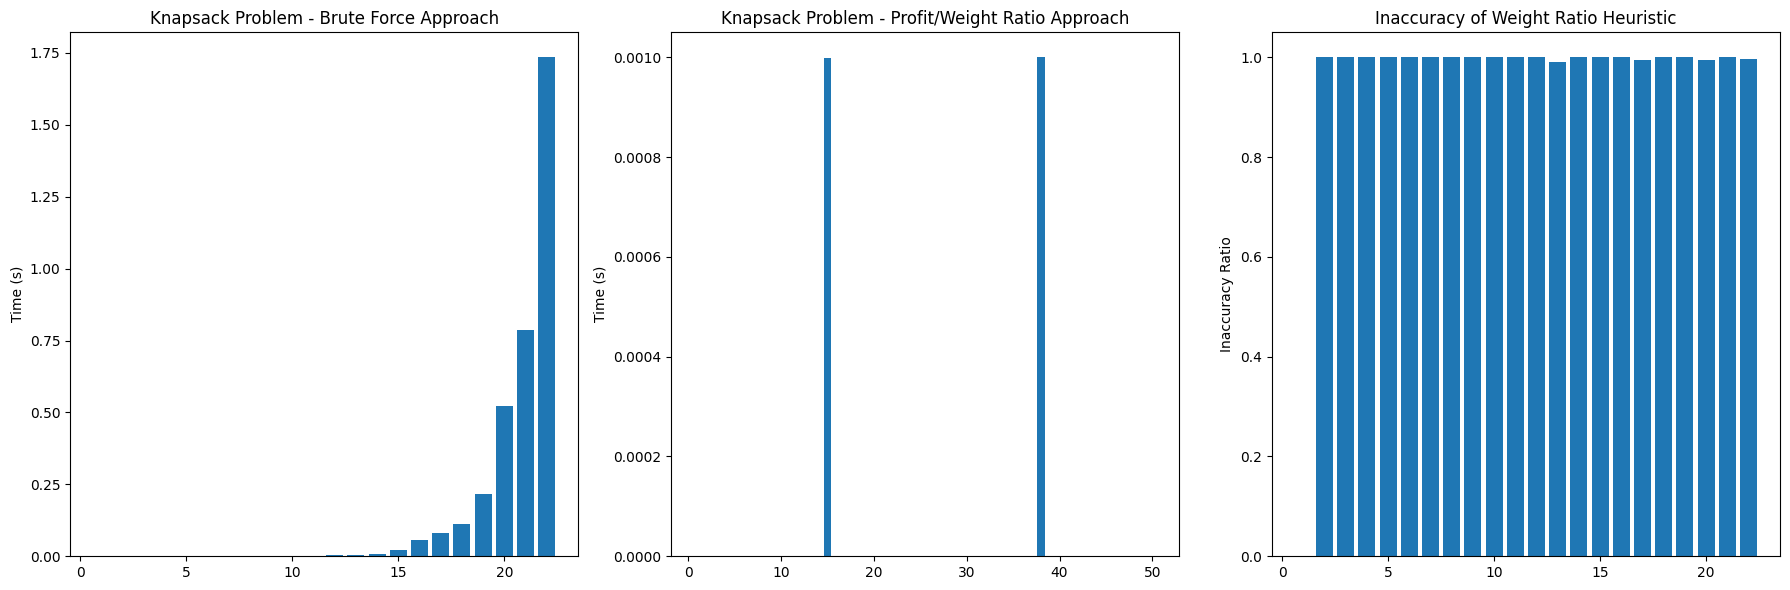

In [60]:
import matplotlib.pyplot as plt
import random
import time
import gc


x_brute_force = [i for i in range(1, 23)]
x_pw_ratio = [i for i in range(1, 51)] 
y_brute_force = []
y_pw_ratio = []
inaccuracy = []

knapsack = KnapSack([], [], 0)

gc.disable()

for i in range(50):
    a, b = 0, 0
    knapsack.profits.append(random.randint(1, 20))
    knapsack.weights.append(random.randint(1, 10))
    knapsack.capacity += random.randint(1, 4)

    if i < 22:
        start = time.time()
        knapsack.solve_knapsack_brute_force()
        y_brute_force.append(time.time() - start)
        a = knapsack.max_profit

    start = time.time()
    knapsack.solve_knapsack_pw_ratio()
    y_pw_ratio.append(time.time() - start)
    b = knapsack.max_profit

    try:
        if i < 22:
            inaccuracy.append(b / a)
    except ZeroDivisionError:
        inaccuracy.append(0)

gc.enable()  

print('PW ratio approach inaccuracy: ')
print(inaccuracy)
print('PW ratio approach inaccuracy average: ')
print(sum(inaccuracy) / len(inaccuracy))

fig, axs = plt.subplots(1, 3, figsize=(18, 6))  

axs[0].bar(x_brute_force, y_brute_force)
axs[0].set_ylabel('Time (s)')
axs[0].set_title('Knapsack Problem - Brute Force Approach')

axs[1].bar(x_pw_ratio, y_pw_ratio)
axs[1].set_ylabel('Time (s)')
axs[1].set_title('Knapsack Problem - Profit/Weight Ratio Approach')

axs[2].bar(x_brute_force, inaccuracy)
axs[2].set_ylabel('Inaccuracy Ratio')
axs[2].set_title('Inaccuracy of Weight Ratio Heuristic')

plt.tight_layout()

plt.show()
